In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AffinityPropagation

In [2]:
calendar = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/Big Data/antverpen/calendar.csv', sep = ',')
antwerpen = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/Big Data/antverpen/listings.csv', sep = ',')

In [3]:
antwerpen.count()

id                                2250
name                              2249
host_id                           2250
host_name                         2249
neighbourhood_group                  0
neighbourhood                     2250
latitude                          2250
longitude                         2250
room_type                         2250
price                             2250
minimum_nights                    2250
number_of_reviews                 2250
last_review                       1915
reviews_per_month                 1915
calculated_host_listings_count    2250
availability_365                  2250
dtype: int64

In [4]:
antwerpen.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,50904,super cosy suite - fashion district,234077,Karin,NaN,Historisch Centrum,51.21858,4.39850,Hotel room,145,1,1,2015-05-06,0.02,4,244
1,116134,Trendy Vacation Apartment Antwerp,586942,Paul,NaN,Eilandje,51.23051,4.40593,Entire home/apt,150,2,86,2019-09-02,0.93,1,327
2,200420,appartement close to city center & sports pala...,979985,Malik,NaN,Stuivenberg,51.22636,4.43119,Private room,24,1,58,2019-09-23,5.47,1,165
3,224333,Large stylish room in 1930s house + garden,1167377,Geert,NaN,Deurne Zuid West,51.19772,4.45853,Private room,19,14,1,2011-09-19,0.01,2,0
4,224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,1263933,Kristien,NaN,Sint-Andries,51.21722,4.39790,Entire home/apt,105,2,292,2019-09-08,3.16,1,335


In [5]:
calendar.head(20)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50904,2019-09-25,f,$150.00,$150.00,1,40
1,50904,2019-09-26,f,$150.00,$150.00,1,40
2,50904,2019-09-27,f,$155.00,$155.00,2,40
3,50904,2019-09-28,f,$155.00,$155.00,1,40
4,50904,2019-09-29,f,$150.00,$150.00,1,40
5,50904,2019-09-30,f,$150.00,$150.00,1,40
6,50904,2019-10-01,f,$150.00,$150.00,1,40
7,50904,2019-10-02,f,$150.00,$150.00,1,40
8,50904,2019-10-03,t,$150.00,$150.00,1,40
9,50904,2019-10-04,t,$155.00,$155.00,2,40


In [7]:
calendar_t = calendar[calendar['available'] == 't']
calendar_t.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
8,50904,2019-10-03,t,$150.00,$150.00,1,40
9,50904,2019-10-04,t,$155.00,$155.00,2,40
10,50904,2019-10-05,t,$155.00,$155.00,2,40
11,50904,2019-10-06,t,$150.00,$150.00,1,40
12,50904,2019-10-07,t,$150.00,$150.00,1,40


In [8]:
calendar_t = calendar_t[['listing_id', 'date']]
calendar_t = calendar_t.groupby('listing_id').count()
calendar_t.head(10)

,date
listing_id,
50904,244
116134,327
200420,165
224682,335
328911,358
345959,302
366252,300
366325,355
445201,320


In [9]:
data = antwerpen.merge(calendar_t, left_on = 'id', right_index = True , how = 'inner')
'''\
Проверка availability_365 = количество дней аренды данного жилья в году.\
'''
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date
0,50904,super cosy suite - fashion district,234077,Karin,NaN,Historisch Centrum,51.21858,4.39850,Hotel room,145,1,1,2015-05-06,0.02,4,244,244
1,116134,Trendy Vacation Apartment Antwerp,586942,Paul,NaN,Eilandje,51.23051,4.40593,Entire home/apt,150,2,86,2019-09-02,0.93,1,327,327
2,200420,appartement close to city center & sports pala...,979985,Malik,NaN,Stuivenberg,51.22636,4.43119,Private room,24,1,58,2019-09-23,5.47,1,165,165
4,224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,1263933,Kristien,NaN,Sint-Andries,51.21722,4.39790,Entire home/apt,105,2,292,2019-09-08,3.16,1,335,335
5,328911,Large Modern Apt W Great Park Views,1263814,Tinne,NaN,Stadspark,51.21078,4.41050,Entire home/apt,55,28,57,2019-09-14,0.62,1,358,358


In [10]:
antwerpen.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.250000e+03,2.250000e+03,0.0,2250.000000,2250.000000,2250.000000,2250.000000,2250.0000,1915.000000,2250.000000,2250.000000
mean,2.324707e+07,8.593331e+07,NaN,51.214194,4.413973,105.752000,4.066667,30.5360,1.885614,4.635556,157.524000
std,1.081597e+07,8.480709e+07,NaN,0.013863,0.018632,158.082656,23.128116,54.4983,2.085646,9.402779,138.403636
min,5.090400e+04,2.010730e+05,NaN,51.161350,4.318030,0.000000,1.000000,0.0000,0.010000,1.000000,0.000000
25%,1.492274e+07,1.537704e+07,NaN,51.207530,4.401385,49.000000,1.000000,2.0000,0.420000,1.000000,6.250000
50%,2.452682e+07,5.096970e+07,NaN,51.216210,4.411225,69.000000,2.000000,9.0000,1.110000,1.000000,129.000000
75%,3.293727e+07,1.411406e+08,NaN,51.221255,4.425728,99.000000,2.000000,33.0000,2.590000,3.000000,315.000000
max,3.889095e+07,2.973333e+08,NaN,51.349400,4.485770,1250.000000,800.000000,591.0000,13.960000,52.000000,365.000000


In [27]:
antwerpen[antwerpen['availability_365'] == 365].count()

id                                40
name                              40
host_id                           40
host_name                         40
neighbourhood_group                0
neighbourhood                     40
latitude                          40
longitude                         40
room_type                         40
price                             40
minimum_nights                    40
number_of_reviews                 40
last_review                       26
reviews_per_month                 26
calculated_host_listings_count    40
availability_365                  40
dtype: int64

In [28]:
antwerpen[antwerpen['availability_365'] < 200].count()

id                                1394
name                              1393
host_id                           1394
host_name                         1393
neighbourhood_group                  0
neighbourhood                     1394
latitude                          1394
longitude                         1394
room_type                         1394
price                             1394
minimum_nights                    1394
number_of_reviews                 1394
last_review                       1211
reviews_per_month                 1211
calculated_host_listings_count    1394
availability_365                  1394
dtype: int64

In [29]:
df = antwerpen[['neighbourhood', 'room_type', 'latitude', 'longitude', 'price', 'minimum_nights',
                               'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']]

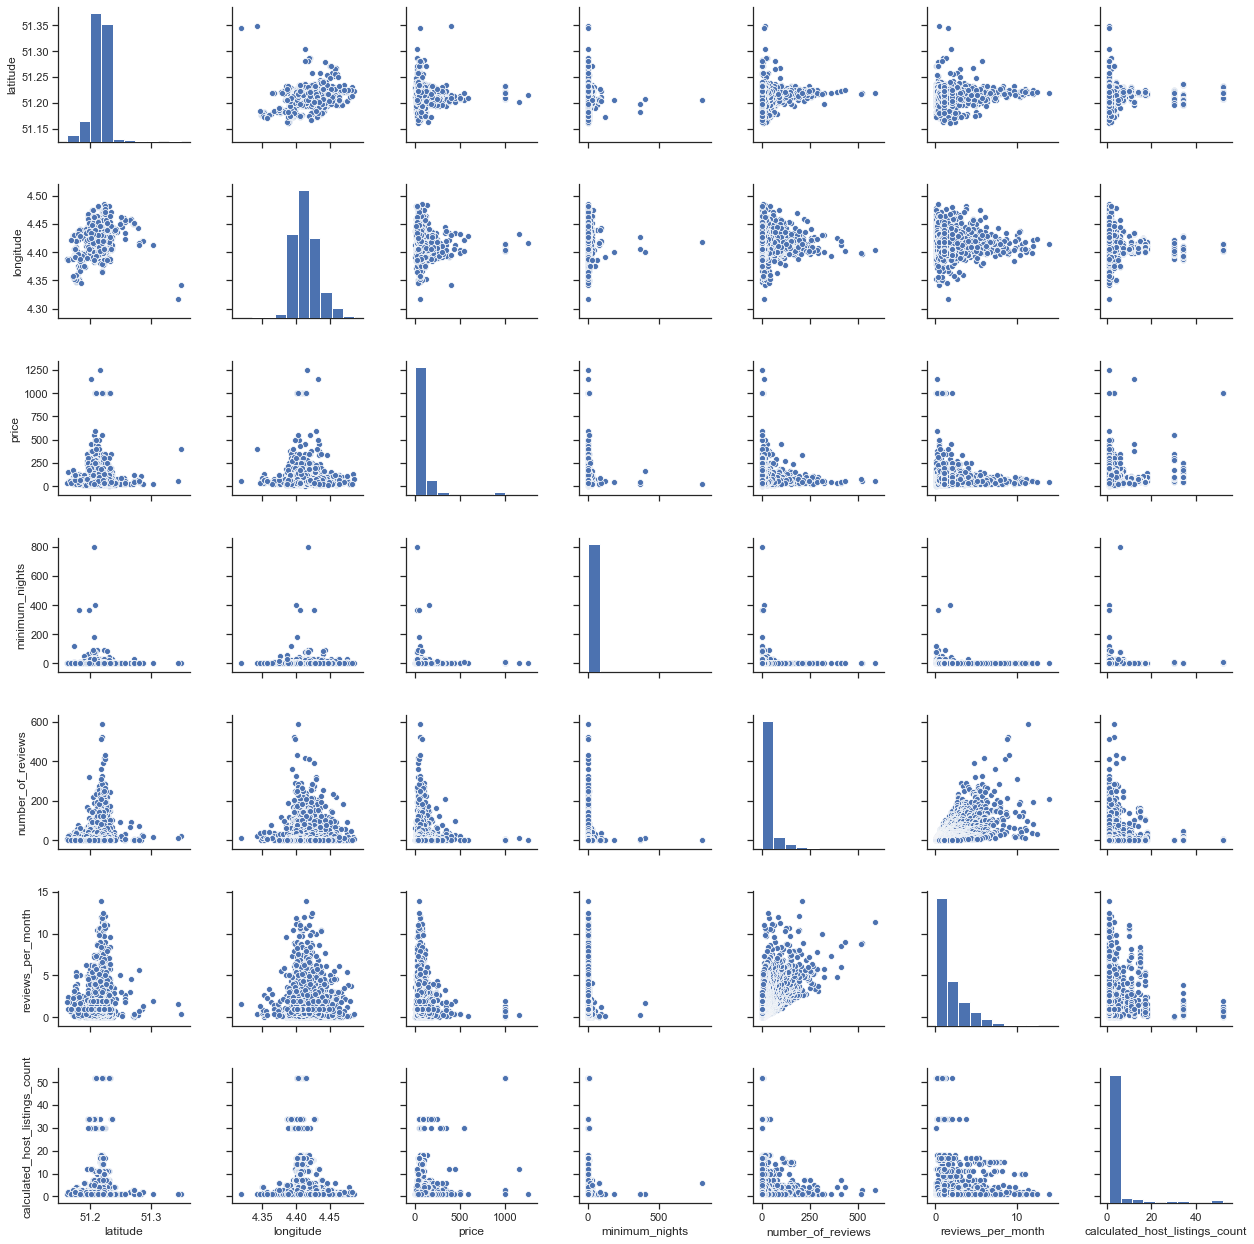

In [30]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)
plt.savefig('pairplot')

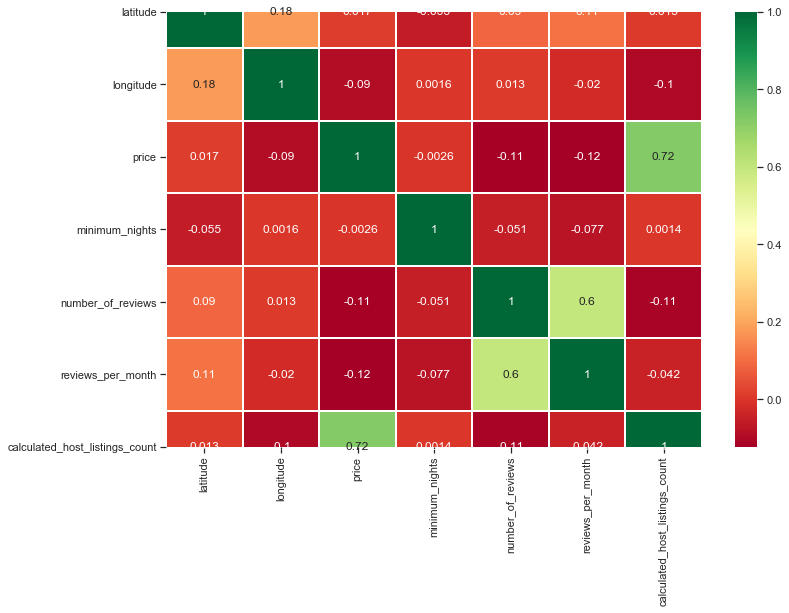

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.savefig('heatmap')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 9 columns):
neighbourhood                     2250 non-null object
room_type                         2250 non-null object
latitude                          2250 non-null float64
longitude                         2250 non-null float64
price                             2250 non-null int64
minimum_nights                    2250 non-null int64
number_of_reviews                 2250 non-null int64
reviews_per_month                 1915 non-null float64
calculated_host_listings_count    2250 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 158.3+ KB


In [33]:
df.reviews_per_month.mean()

1.885613577023503

In [34]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(1.88)

C:\Users\karpo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 9 columns):
neighbourhood                     2250 non-null object
room_type                         2250 non-null object
latitude                          2250 non-null float64
longitude                         2250 non-null float64
price                             2250 non-null int64
minimum_nights                    2250 non-null int64
number_of_reviews                 2250 non-null int64
reviews_per_month                 2250 non-null float64
calculated_host_listings_count    2250 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 158.3+ KB


In [36]:
pred = pd.get_dummies(df)
pred.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,neighbourhood_Amandus - Atheneum,neighbourhood_Borgerhout Extra Muros,neighbourhood_Borgerhout Intra Muros Noord,...,neighbourhood_Tuinwijk,neighbourhood_Universiteitsbuurt,neighbourhood_Valaar,neighbourhood_Wilrijk Centrum,neighbourhood_Zuid,neighbourhood_Zurenborg,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,51.21858,4.39850,145,1,1,0.02,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,51.23051,4.40593,150,2,86,0.93,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,51.22636,4.43119,24,1,58,5.47,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,51.19772,4.45853,19,14,1,0.01,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,51.21722,4.39790,105,2,292,3.16,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
pred = pred.dropna()

In [38]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    cluster_centers_indices = model.cluster_centers_indices_
    labels = model.labels_
    n_clusters_ = len(cluster_centers_indices)
    print('Estimated number of clusters: %d'%n_clusters_)
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(pred)
affinity = pd.DataFrame(clust_labels2)
pred.insert((pred.shape[1]),'affinity',affinity)

Estimated number of clusters: 105


In [39]:
pred.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,neighbourhood_Amandus - Atheneum,neighbourhood_Borgerhout Extra Muros,neighbourhood_Borgerhout Intra Muros Noord,...,neighbourhood_Universiteitsbuurt,neighbourhood_Valaar,neighbourhood_Wilrijk Centrum,neighbourhood_Zuid,neighbourhood_Zurenborg,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,affinity
0,51.21858,4.39850,145,1,1,0.02,4,0,0,0,...,0,0,0,0,0,0,1,0,0,64
1,51.23051,4.40593,150,2,86,0.93,1,0,0,0,...,0,0,0,0,0,1,0,0,0,30
2,51.22636,4.43119,24,1,58,5.47,1,0,0,0,...,0,0,0,0,0,0,0,1,0,52
3,51.19772,4.45853,19,14,1,0.01,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,51.21722,4.39790,105,2,292,3.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,14


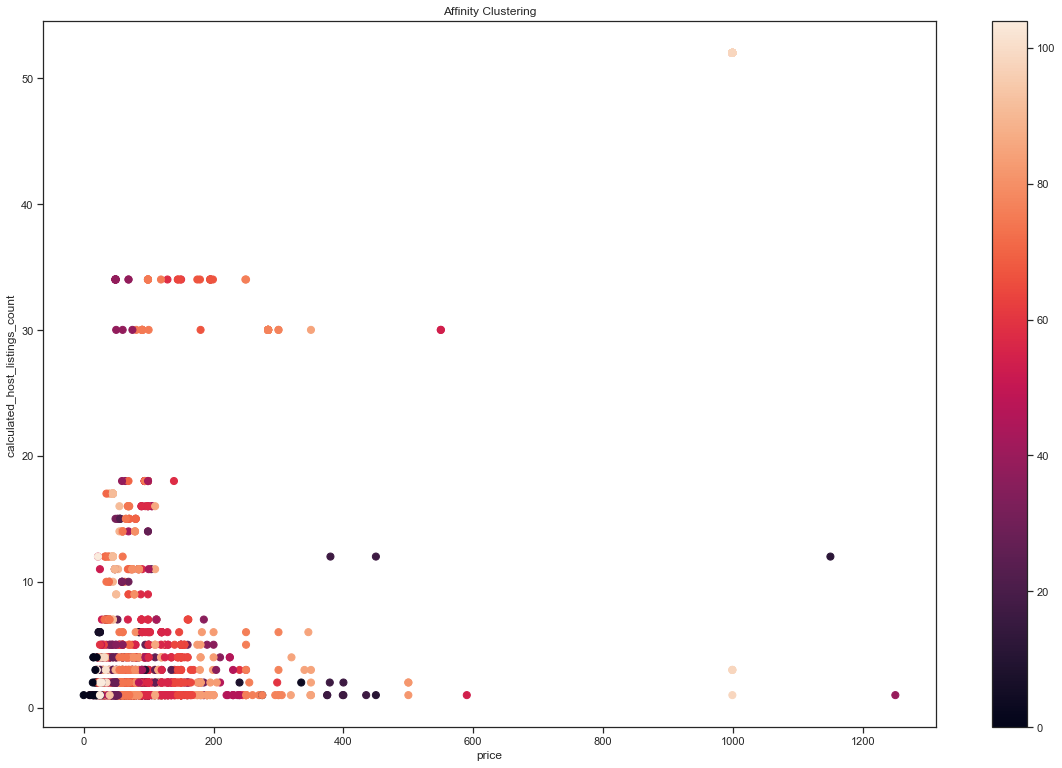

In [40]:
fig = plt.figure(figsize = (20,13))
ax = fig.add_subplot(111)
scatter = ax.scatter(pred['price'],pred['calculated_host_listings_count'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('price')
ax.set_ylabel('calculated_host_listings_count ')
plt.colorbar(scatter)
plt.savefig('affinitypricelisting')

In [41]:
filtered = pred[['affinity']]

In [42]:
filtered = filtered.merge(antwerpen, left_index = True, right_index = True, how = 'inner')
filtered = filtered[['id', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'availability_365', 'affinity']]

In [43]:
filtered.head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
0,50904,Historisch Centrum,Hotel room,145,1,244,64
1,116134,Eilandje,Entire home/apt,150,2,327,30
2,200420,Stuivenberg,Private room,24,1,165,52
3,224333,Deurne Zuid West,Private room,19,14,0,1
4,224682,Sint-Andries,Entire home/apt,105,2,335,14


In [44]:
mean_availability = filtered.groupby('affinity').mean().sort_values('availability_365', ascending = 0)
mean_availability.head(20)

,id,price,minimum_nights,availability_365
affinity,,,,
0,1.145983e+06,35.000000,1.000000,365.000000
12,7.264462e+06,1150.000000,1.000000,365.000000
2,2.073182e+06,23.000000,800.000000,364.000000
75,2.722030e+07,96.333333,2.095238,347.047619
67,2.778424e+07,189.125000,1.375000,340.500000
98,3.330281e+07,999.000000,5.857143,337.892857
54,2.872268e+07,563.333333,5.666667,331.333333
20,1.079739e+07,160.000000,400.000000,329.000000
62,2.481285e+07,35.000000,3.000000,328.000000


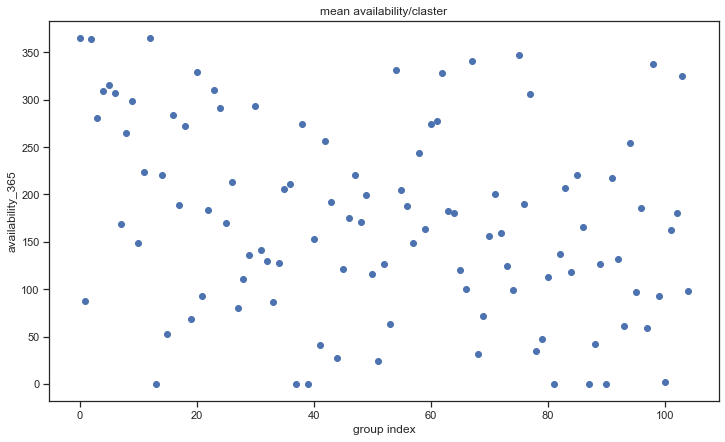

In [45]:
plt.figure(figsize=(12,7))
plt.scatter(mean_availability.index, mean_availability['availability_365'])
plt.xlabel('group index')
plt.ylabel('availability_365')
plt.title('mean availability/claster')
plt.savefig('meanavailabilityclaster')

plt.figure(figsize=(10,7))
plt.scatter(mean_availability.index, mean_availability['availability_365'])
plt.xlabel('affinity')
plt.ylabel('availability')
plt.title('most popular appertment in group')
plt.legend('group', loc = 'best')

Text(0, 0.5, 'availability_365')

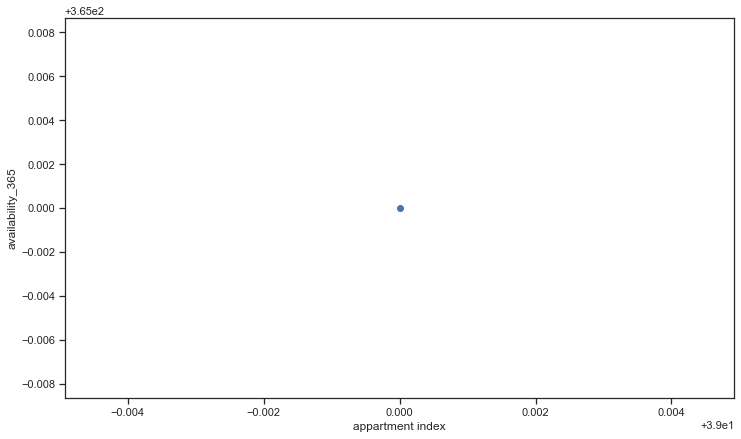

In [46]:
group_0 = filtered[filtered['affinity'] == 0]
plt.figure(figsize=(12,7))
plt.scatter(group_0.index, group_0['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

In [47]:
group_0[group_0['availability_365'] < 200]

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [48]:
group_12 = filtered[filtered['affinity'] == 12]
group_2 = filtered[filtered['affinity'] == 2]
group_75 = filtered[filtered['affinity'] == 75]
group_67 = filtered[filtered['affinity'] == 67]
group_98 = filtered[filtered['affinity'] == 98]
group_54 = filtered[filtered['affinity'] == 54]
group_20 = filtered[filtered['affinity'] == 20]
group_62 = filtered[filtered['affinity'] == 62]
group_103 = filtered[filtered['affinity'] == 103]
group_5 = filtered[filtered['affinity'] == 5]
group_23 = filtered[filtered['affinity'] == 23]
group_4 = filtered[filtered['affinity'] == 4]
group_6 = filtered[filtered['affinity'] == 6]
group_77 = filtered[filtered['affinity'] == 77]
group_9 = filtered[filtered['affinity'] == 9]
group_30 = filtered[filtered['affinity'] == 30]
group_24 = filtered[filtered['affinity'] == 24]
group_16 = filtered[filtered['affinity'] == 16]
group_3 = filtered[filtered['affinity'] == 3]

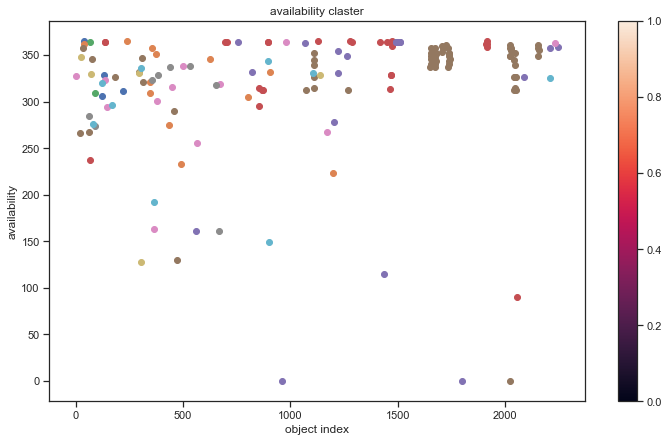

In [49]:
plt.figure(figsize=(12,7))
plt.scatter(group_0.index, group_0['availability_365'])
plt.scatter(group_12.index, group_12['availability_365'])
plt.scatter(group_2.index, group_2['availability_365'])
plt.scatter(group_75.index, group_75['availability_365'])
plt.scatter(group_67.index, group_67['availability_365'])
plt.scatter(group_98.index, group_98['availability_365'])
plt.scatter(group_54.index, group_54['availability_365'])
plt.scatter(group_20.index, group_20['availability_365'])
plt.scatter(group_62.index, group_62['availability_365'])
plt.scatter(group_103.index, group_103['availability_365'])
plt.scatter(group_5.index, group_5['availability_365'])
plt.scatter(group_23.index, group_23['availability_365'])
plt.scatter(group_4.index, group_4['availability_365'])
plt.scatter(group_6.index, group_6['availability_365'])
plt.scatter(group_77.index, group_77['availability_365'])
plt.scatter(group_9.index, group_9['availability_365'])
plt.scatter(group_30.index, group_30['availability_365'])
plt.scatter(group_24.index, group_24['availability_365'])
plt.scatter(group_16.index, group_16['availability_365'])
plt.scatter(group_3.index, group_3['availability_365'])
plt.xlabel('object index')
plt.ylabel('availability')
plt.title('availability claster')
plt.colorbar()
plt.savefig('clastertop20')

Text(0, 0.5, 'availability_365')

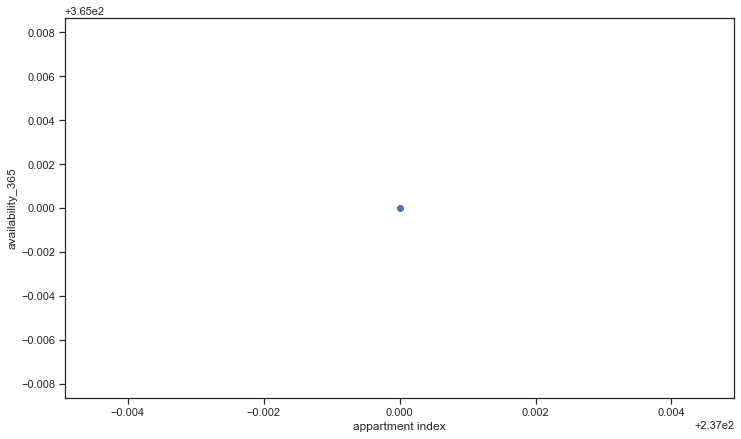

In [50]:
plt.figure(figsize=(12,7))
plt.scatter(group_12.index, group_12['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

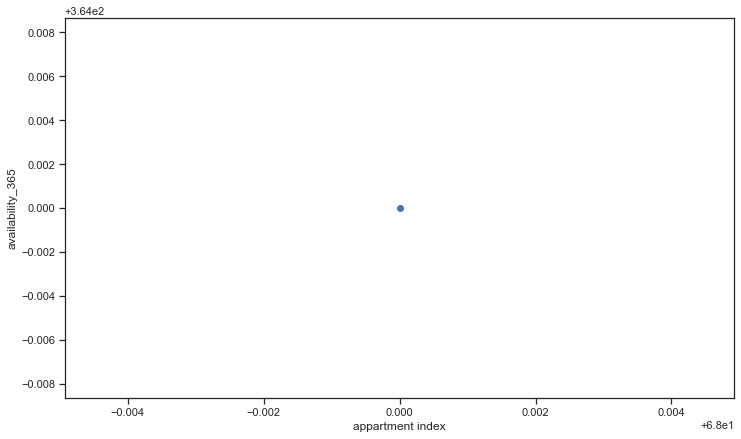

In [51]:
plt.figure(figsize=(12,7))
plt.scatter(group_2.index, group_2['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

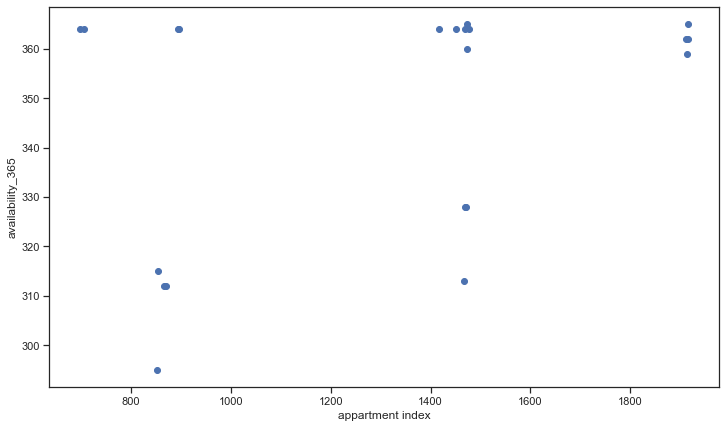

In [52]:
plt.figure(figsize=(12,7))
plt.scatter(group_75.index, group_75['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

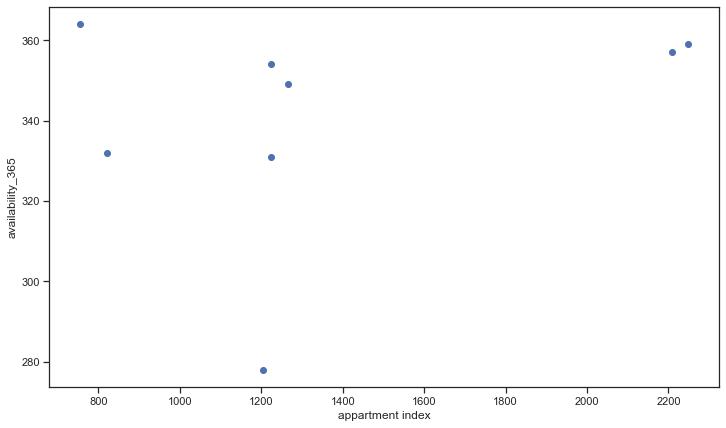

In [53]:
plt.figure(figsize=(12,7))
plt.scatter(group_67.index, group_67['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

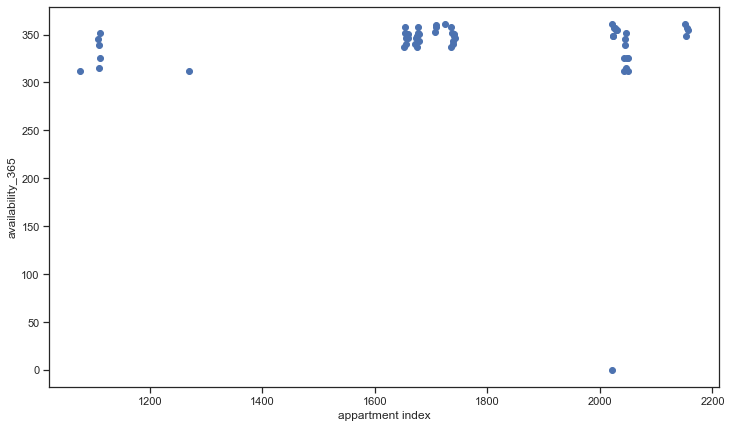

In [54]:
plt.figure(figsize=(12,7))
plt.scatter(group_98.index, group_98['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

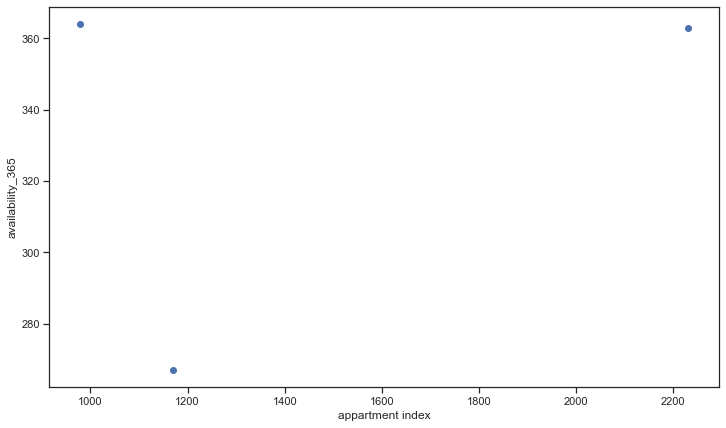

In [55]:
plt.figure(figsize=(12,7))
plt.scatter(group_54.index, group_54['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

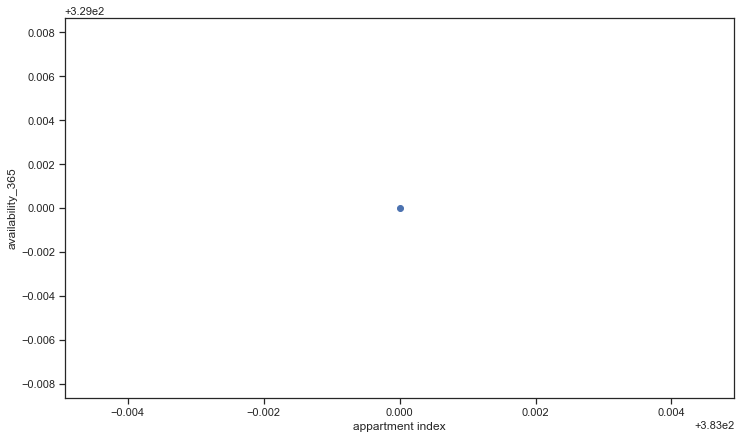

In [56]:
plt.figure(figsize=(12,7))
plt.scatter(group_20.index, group_20['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

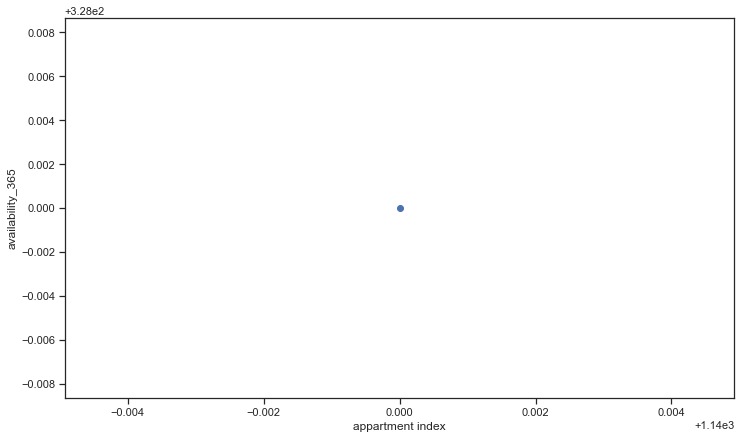

In [57]:
plt.figure(figsize=(12,7))
plt.scatter(group_62.index, group_62['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

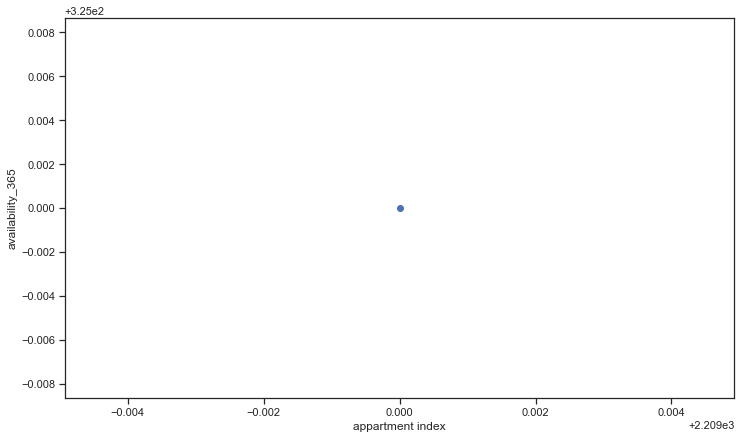

In [58]:
plt.figure(figsize=(12,7))
plt.scatter(group_103.index, group_103['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

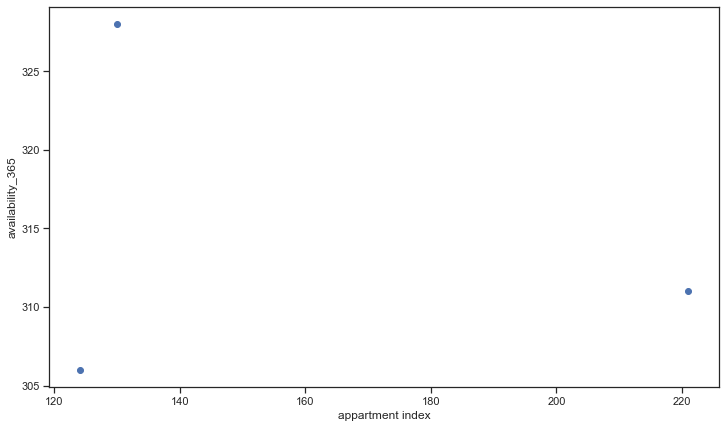

In [59]:
plt.figure(figsize=(12,7))
plt.scatter(group_5.index, group_5['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

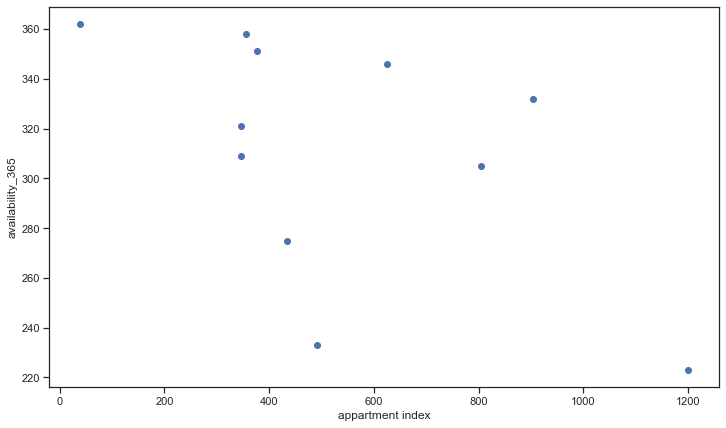

In [60]:
plt.figure(figsize=(12,7))
plt.scatter(group_23.index, group_23['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

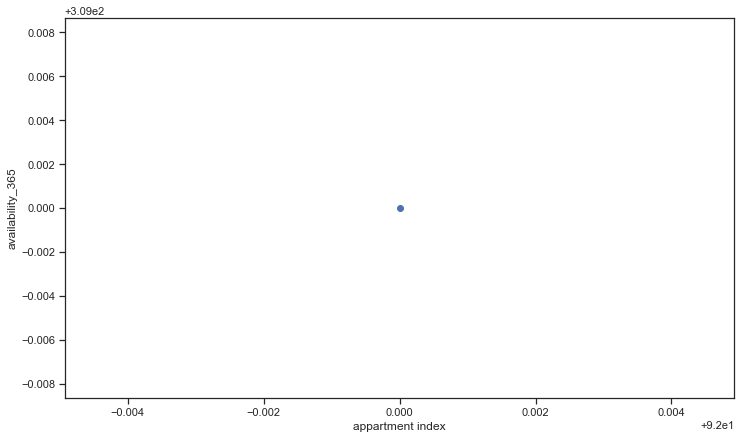

In [61]:
plt.figure(figsize=(12,7))
plt.scatter(group_4.index, group_4['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

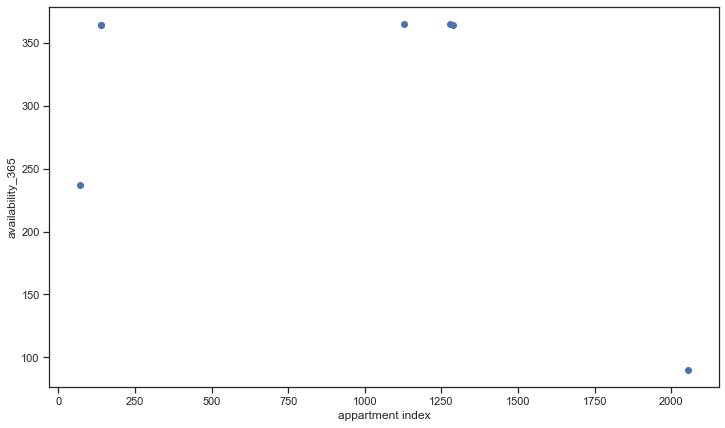

In [62]:
plt.figure(figsize=(12,7))
plt.scatter(group_6.index, group_6['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

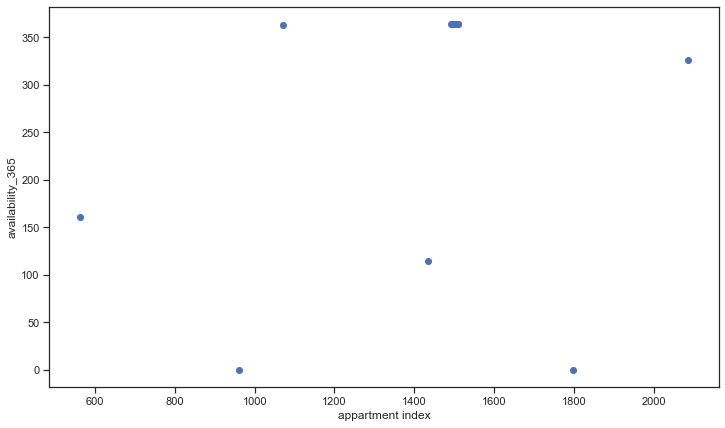

In [63]:
plt.figure(figsize=(12,7))
plt.scatter(group_77.index, group_77['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

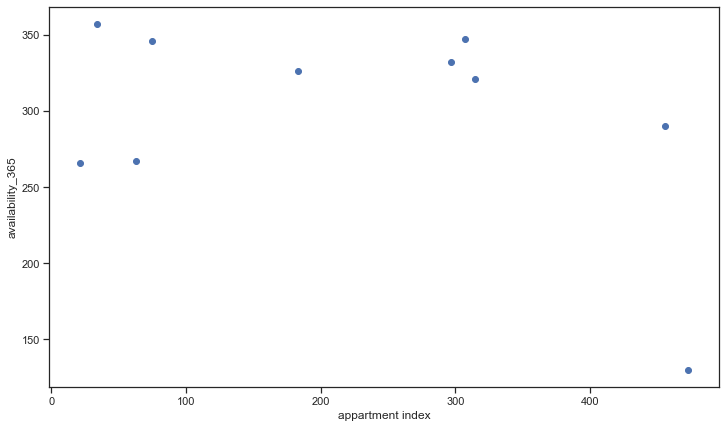

In [64]:
plt.figure(figsize=(12,7))
plt.scatter(group_9.index, group_9['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

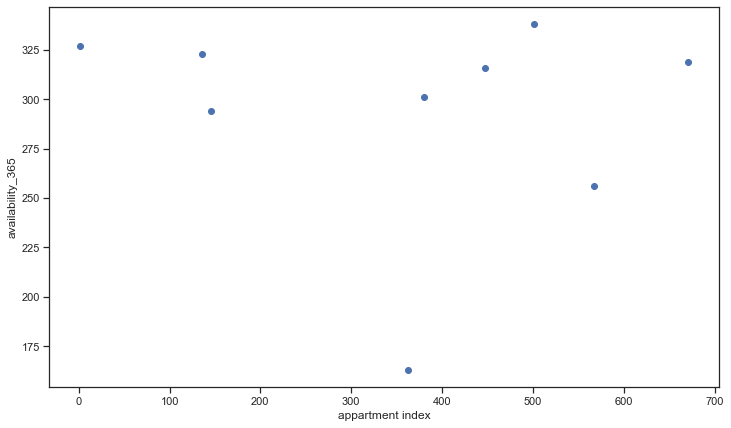

In [65]:
plt.figure(figsize=(12,7))
plt.scatter(group_30.index, group_30['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

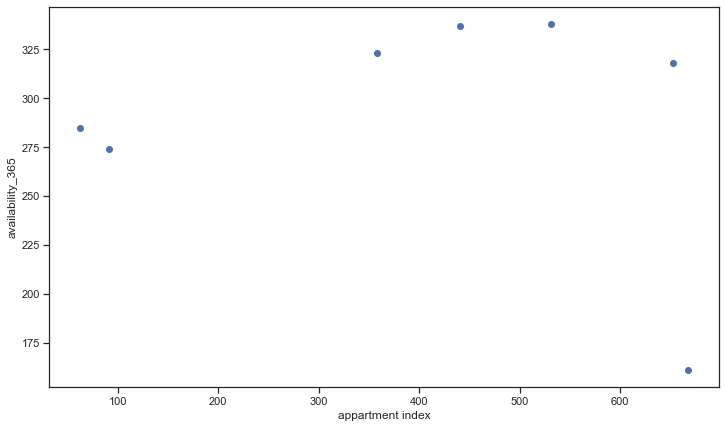

In [66]:
plt.figure(figsize=(12,7))
plt.scatter(group_24.index, group_24['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

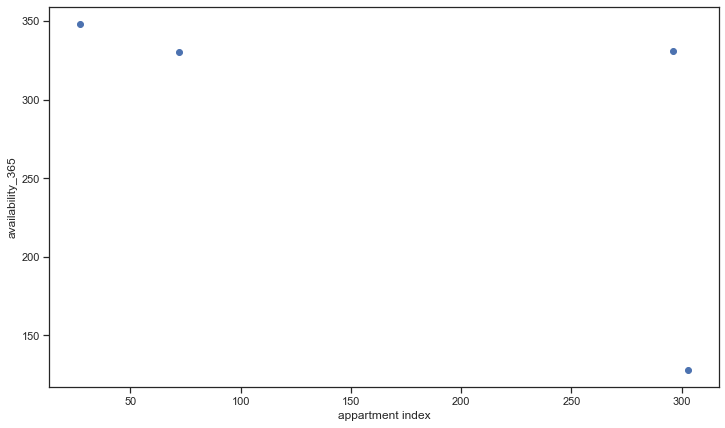

In [67]:
plt.figure(figsize=(12,7))
plt.scatter(group_16.index, group_16['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

Text(0, 0.5, 'availability_365')

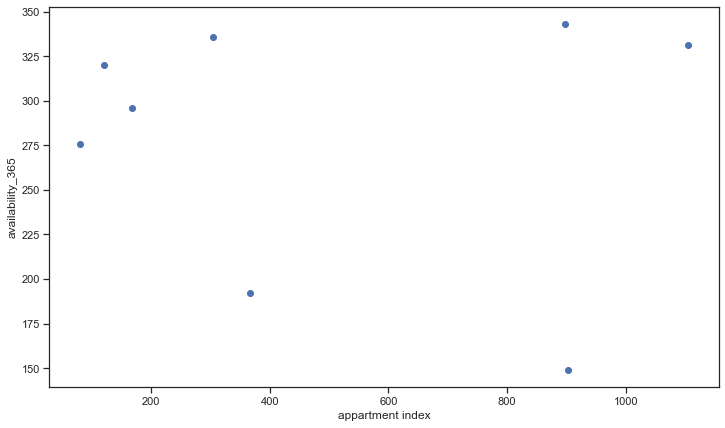

In [68]:
plt.figure(figsize=(12,7))
plt.scatter(group_3.index, group_3['availability_365'])
plt.xlabel('appartment index')
plt.ylabel('availability_365')

In [70]:
group_12[group_12['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [71]:
group_2[group_2['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [72]:
group_75[group_75['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [73]:
group_67[group_67['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [74]:
group_98[group_98['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
2021,36424110,Historisch Centrum,Entire home/apt,999,7,0,98


In [75]:
group_54[group_54['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [76]:
group_20[group_20['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [77]:
group_62[group_62['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [78]:
group_103[group_103['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [79]:
group_5[group_5['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [80]:
group_23[group_23['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [81]:
group_4[group_4['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity


In [82]:
group_6[group_6['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
2056,36612160,Groenenhoek,Entire home/apt,35,90,90,6


In [83]:
group_77[group_77['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
561,14897210,Stadspark,Entire home/apt,305,2,161,77
961,21875839,Sint-Andries,Entire home/apt,300,2,0,77
1435,29813332,Historisch Centrum,Entire home/apt,300,1,115,77
1799,34150960,Eilandje,Entire home/apt,300,3,0,77


In [84]:
group_9[group_9['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
473,13027951,Historisch Centrum,Entire home/apt,100,1,130,9


In [85]:
group_30[group_30['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
363,10170353,Amandus - Atheneum,Entire home/apt,160,2,163,30


In [86]:
group_24[group_24['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
668,17011231,Historisch Centrum,Entire home/apt,135,2,161,24


In [87]:
group_16[group_16['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
303,8766126,Historisch Centrum,Entire home/apt,60,1,128,16


In [88]:
group_3[group_3['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
367,10286773,Historisch Centrum,Entire home/apt,75,2,192,3
902,20942852,Universiteitsbuurt,Entire home/apt,115,1,149,3


In [89]:
group_0[group_0['availability_365']<200].head()

,id,neighbourhood,room_type,price,minimum_nights,availability_365,affinity
